<img src='Cover Photo/Click.jpg' style='height:200px'/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Duplicate-Observations" data-toc-modified-id="Duplicate-Observations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Duplicate Observations</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Missing Values</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li><li><span><a href="#Unique-Values" data-toc-modified-id="Unique-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Unique Values</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outlier Detection</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Descriptive-Analytics" data-toc-modified-id="Descriptive-Analytics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Descriptive Analytics</a></span><ul class="toc-item"><li><span><a href="#Statistical-Analysis" data-toc-modified-id="Statistical-Analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Statistical Analysis</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#Predictive-Analytics" data-toc-modified-id="Predictive-Analytics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Analytics</a></span><ul class="toc-item"><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Predictions</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

This project presents insights obtained from a hotel website data as well as application of machine learning and deep learning techniques to accurately predict number clicks based on the hotel factors (e.g., stars, reviews, etc.). 

Due to large volume of data and extensive computations in this project (e.g., grid search, clustering, and nearest neighbors), the computation was carried out with TPUs on google colab as follows:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# statistical analysis libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')# deep learning libraries 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import plot_model

# Data Cleaning

In [7]:
# Read CSV 
hotel_df = pd.read_csv('/content/drive/My Drive/Audicia/train_set.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             395979 non-null  float64
 2   content_score       395979 non-null  float64
 3   n_images            395978 non-null  float64
 4   distance_to_center  395958 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               395925 non-null  float64
 7   n_reviews           395958 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396317 non-null  float64
 10  avg_saving_percent  396317 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 36.3 MB


## Duplicate Observations

In [8]:
# Delete duplicates
hotel_df.drop_duplicates(inplace=True)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             395979 non-null  float64
 2   content_score       395979 non-null  float64
 3   n_images            395978 non-null  float64
 4   distance_to_center  395958 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               395925 non-null  float64
 7   n_reviews           395958 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396317 non-null  float64
 10  avg_saving_percent  396317 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 39.3 MB


## Missing Values

In [9]:
# Percent missing value
hotel_df.isna().mean()*100

hotel_id               0.000000
city_id                0.128125
content_score          0.128125
n_images               0.128377
distance_to_center     0.133422
avg_rating            27.844040
stars                  0.141745
n_reviews              0.133422
avg_rank               0.000000
avg_price              0.042877
avg_saving_percent     0.042877
n_clicks               0.000000
dtype: float64

Except for `avg_rating` other columns have less than three percent missing values, so the approach for dealing with them does not make much difference. In this project, they were replaced by median value of the corresponding column as follows:

In [10]:
# fill all columns except avg_rating with median
except_rating_list = [ col for col in hotel_df.columns if col != 'avg_rating' ]
fill_df = hotel_df.copy()
fill_df[except_rating_list] = hotel_df[except_rating_list].fillna(hotel_df[except_rating_list].median())
fill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             396487 non-null  float64
 2   content_score       396487 non-null  float64
 3   n_images            396487 non-null  float64
 4   distance_to_center  396487 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               396487 non-null  float64
 7   n_reviews           396487 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396487 non-null  float64
 10  avg_saving_percent  396487 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 39.3 MB


Missing values `avg_rating` is assumed not to be completely at random because the column distribution shows that most of the rating are accumulated on high values and therefore it is likely that low-rating hotels have not reported, so it was decided to use other columns and impute the missing values by regression.

In [11]:
# filter rows with available values for training
rating_train_df = fill_df[~fill_df['avg_rating'].isna()]
rating_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286089 entries, 0 to 396472
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            286089 non-null  float64
 1   city_id             286089 non-null  float64
 2   content_score       286089 non-null  float64
 3   n_images            286089 non-null  float64
 4   distance_to_center  286089 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               286089 non-null  float64
 7   n_reviews           286089 non-null  float64
 8   avg_rank            286089 non-null  float64
 9   avg_price           286089 non-null  float64
 10  avg_saving_percent  286089 non-null  float64
 11  n_clicks            286089 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 28.4 MB


In [12]:
# filter rows with missing values for testing
rating_test_df = fill_df[fill_df['avg_rating'].isna()]
rating_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110398 entries, 9 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            110398 non-null  float64
 1   city_id             110398 non-null  float64
 2   content_score       110398 non-null  float64
 3   n_images            110398 non-null  float64
 4   distance_to_center  110398 non-null  float64
 5   avg_rating          0 non-null       float64
 6   stars               110398 non-null  float64
 7   n_reviews           110398 non-null  float64
 8   avg_rank            110398 non-null  float64
 9   avg_price           110398 non-null  float64
 10  avg_saving_percent  110398 non-null  float64
 11  n_clicks            110398 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 10.9 MB


In [13]:
# seperate target from features
X = rating_train_df[[ col for col in fill_df.columns if col != 'avg_rating' ]]
y = rating_train_df['avg_rating']

In [14]:
# split train and test sets from original dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.21299043545260865
0.2110679564287353


In [17]:
# seperate target from features
X = rating_test_df[[ col for col in fill_df.columns if col != 'avg_rating' ]]
X.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
9,9.902959e+10,208612.0,48.0,1.0,1795.0,0.0,0.0,19.0,21.38,0.0,0
26,1.004976e+11,54398.0,52.0,1.0,1013.0,0.0,0.0,20.5,56.00,0.0,0
74,1.115944e+11,61992.0,45.0,0.0,144.0,0.0,0.0,19.0,82.26,0.0,0
81,1.181972e+11,56480.0,49.0,0.0,10417.0,0.0,0.0,10.5,175.80,0.0,0
93,1.191401e+11,27532.0,46.0,0.0,1321.0,0.0,0.0,13.0,60.83,0.0,0


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# dataframe of predictions with same indicies as missing values
rating_array = dt.predict(X)
rating_df = pd.DataFrame(rating_array, index=rating_test_df.index, columns=['imputation'])
rating_df.head()

,imputation
9,75.684395
26,75.438351
74,75.438351
81,80.394163
93,75.438351


In [20]:
rating_df

,imputation
9,75.684395
26,75.438351
74,75.438351
81,80.394163
93,75.438351
...,...
396482,75.438351
396483,75.684395
396484,75.684395
396485,75.438351


In [21]:
rating_df.describe()

,imputation
count,110398.000000
mean,81.651968
std,2.535997
min,68.131439
25%,80.600648
50%,82.605788
75%,83.812887
max,87.168339


In [22]:
# assign the missing values with right index to predictions 
rating_test_df['avg_rating'] = rating_df
rating_test_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
9,9.902959e+10,208612.0,48.0,1.0,1795.0,75.684395,0.0,0.0,19.000,21.38,0.0,0
26,1.004976e+11,54398.0,52.0,1.0,1013.0,75.438351,0.0,0.0,20.500,56.00,0.0,0
74,1.115944e+11,61992.0,45.0,0.0,144.0,75.438351,0.0,0.0,19.000,82.26,0.0,0
81,1.181972e+11,56480.0,49.0,0.0,10417.0,80.394163,0.0,0.0,10.500,175.80,0.0,0
93,1.191401e+11,27532.0,46.0,0.0,1321.0,75.438351,0.0,0.0,13.000,60.83,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
396482,1.277185e+11,55122.0,53.0,1.0,1516.0,75.438351,0.0,189.0,17.333,103.07,0.0,0
396483,6.841541e+09,55122.0,53.0,1.0,1516.0,75.684395,0.0,189.0,12.000,44.00,0.0,0
396484,8.649506e+10,55122.0,53.0,1.0,1516.0,75.684395,0.0,189.0,6.400,42.78,29.0,4
396485,1.293587e+11,55122.0,53.0,1.0,1516.0,75.438351,0.0,189.0,18.143,96.23,36.0,4


In [23]:
# concatenate the train and test dataframe back the original form
imputed_df = pd.concat([rating_train_df, rating_test_df])
imputed_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.000000,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.000000,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.000000,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.000000,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.000000,0.0,603.0,12.564,173.25,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
396482,1.277185e+11,55122.0,53.0,1.0,1516.0,75.438351,0.0,189.0,17.333,103.07,0.0,0
396483,6.841541e+09,55122.0,53.0,1.0,1516.0,75.684395,0.0,189.0,12.000,44.00,0.0,0
396484,8.649506e+10,55122.0,53.0,1.0,1516.0,75.684395,0.0,189.0,6.400,42.78,29.0,4
396485,1.293587e+11,55122.0,53.0,1.0,1516.0,75.438351,0.0,189.0,18.143,96.23,36.0,4


# Exploratory Analysis

## Descriptive Statistics

In [24]:
imputed_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.964870e+05,396487.000000,396487.000000,3.964870e+05,3.964870e+05,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000
mean,1.326304e+11,149072.936066,50.995367,2.589896e+02,1.632404e+04,81.626394,1.158015,912.700555,14.694502,109.318464,7.176523,13.781980
std,1.033722e+11,219074.667559,11.556257,1.730570e+04,2.750368e+05,5.290106,1.619152,2431.014796,5.604578,148.168528,13.079568,123.572896
min,1.557962e+08,2.000000,7.000000,-1.000000e+00,0.000000e+00,34.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4.062255e+10,32080.000000,45.000000,0.000000e+00,5.450000e+02,79.290087,0.000000,0.000000,11.091000,51.060000,0.000000,0.000000
50%,1.087280e+11,55122.000000,53.000000,1.000000e+00,1.516000e+03,82.605788,0.000000,189.000000,15.000000,77.650000,0.000000,0.000000
75%,2.281935e+11,137456.000000,59.000000,2.000000e+00,4.158000e+03,85.000000,3.000000,777.000000,18.375000,120.910000,10.000000,2.000000
max,3.237114e+11,878736.000000,81.000000,2.393911e+06,1.834155e+07,97.000000,5.000000,283089.000000,100.000000,8000.000000,99.000000,13742.000000


Discriptive statistics shows that different features have very different scales. For instance, `hotel_id` is in order of 10^11 while stars are less than 10. This can give undue effect to certain features over others and therefore has to be dealt with by scaling. 
Furthermore, qurtiles show that most of the features have skewed distribution that can decrease accuracy of predition techniques, so transformations should be employed to normalize feature distributions

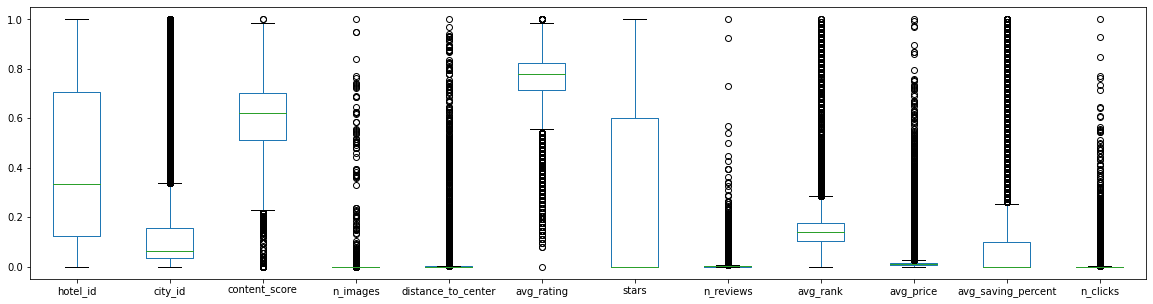

In [25]:
min_max_scaler = MinMaxScaler()

def min_max_dataframe_dist(df):
    '''
    computes and displays distributions of columns scaled by min-max scaer  
    '''
    min_max_df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
    min_max_df.plot.box(figsize=(20, 5));

min_max_dataframe_dist(fill_df)

In [26]:
# numerical difference between hotel ids compared to data size
imputed_df.hotel_id.max() - imputed_df.hotel_id.min() 

323555587601.0

Except for `hotel_id`, `content_score`, and `stars` rest of columns are extremely skewed. 

## Unique Values

In [27]:
imputed_df.nunique() 

hotel_id              396487
city_id                33213
content_score             75
n_images                 318
distance_to_center     32694
avg_rating                79
stars                      6
n_reviews               5817
avg_rank               18563
avg_price              41545
avg_saving_percent       100
n_clicks                1020
dtype: int64

There are as many unique `hotel_id` as there are data points, therefore the ids are distributed uniformly. Except for stars, rest of the columns have high number of unique numbers.

In [28]:
imputed_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.964870e+05,396487.000000,396487.000000,3.964870e+05,3.964870e+05,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000
mean,1.326304e+11,149072.936066,50.995367,2.589896e+02,1.632404e+04,81.626394,1.158015,912.700555,14.694502,109.318464,7.176523,13.781980
std,1.033722e+11,219074.667559,11.556257,1.730570e+04,2.750368e+05,5.290106,1.619152,2431.014796,5.604578,148.168528,13.079568,123.572896
min,1.557962e+08,2.000000,7.000000,-1.000000e+00,0.000000e+00,34.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4.062255e+10,32080.000000,45.000000,0.000000e+00,5.450000e+02,79.290087,0.000000,0.000000,11.091000,51.060000,0.000000,0.000000
50%,1.087280e+11,55122.000000,53.000000,1.000000e+00,1.516000e+03,82.605788,0.000000,189.000000,15.000000,77.650000,0.000000,0.000000
75%,2.281935e+11,137456.000000,59.000000,2.000000e+00,4.158000e+03,85.000000,3.000000,777.000000,18.375000,120.910000,10.000000,2.000000
max,3.237114e+11,878736.000000,81.000000,2.393911e+06,1.834155e+07,97.000000,5.000000,283089.000000,100.000000,8000.000000,99.000000,13742.000000


## Correlation Analysis

In [29]:
imputed_df.head() 

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10


In [30]:
# heatmap of correlation matrix 
imputed_df.corr().style.background_gradient()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.000000,0.049902,-0.714204,-0.013942,0.036475,0.259588,-0.572863,-0.334301,0.157613,0.130131,-0.392847,-0.095660
city_id,0.049902,1.000000,-0.038729,-0.002996,0.015615,0.025819,-0.043081,-0.091040,-0.029889,-0.052992,-0.057476,-0.042848
content_score,-0.714204,-0.038729,1.000000,0.012109,-0.113251,-0.131566,0.535589,0.289141,-0.142172,-0.074750,0.388014,0.095414
n_images,-0.013942,-0.002996,0.012109,1.000000,-0.000639,-0.000925,0.010530,0.015633,-0.002398,-0.001429,0.004674,0.002911
distance_to_center,0.036475,0.015615,-0.113251,-0.000639,1.000000,0.005195,-0.022739,-0.015049,-0.001912,0.007150,-0.014870,-0.004722
avg_rating,0.259588,0.025819,-0.131566,-0.000925,0.005195,1.000000,-0.081224,-0.069597,0.011958,0.170465,-0.145857,0.004471
stars,-0.572863,-0.043081,0.535589,0.010530,-0.022739,-0.081224,1.000000,0.345666,-0.167163,-0.010221,0.467758,0.130785
n_reviews,-0.334301,-0.091040,0.289141,0.015633,-0.015049,-0.069597,0.345666,1.000000,-0.104923,-0.002863,0.372551,0.215484
avg_rank,0.157613,-0.029889,-0.142172,-0.002398,-0.001912,0.011958,-0.167163,-0.104923,1.000000,0.016139,-0.121031,-0.081410
avg_price,0.130131,-0.052992,-0.074750,-0.001429,0.007150,0.170465,-0.010221,-0.002863,0.016139,1.000000,-0.028081,0.015341


`hotel_id` has relatively high correlations with other columns. This might be due to the fact that the hotel IDs are assigned one after another based on the establishment date of the hotel which affects many feature. For instance, more recent hotels might have less images because there has not been enough time for people to take pictures and post them therefore it has negative correlation with `n_images`. As an other example, new hotels tend to be more expensive because of their ameneties and therefore the positive correlation with `avg_price`.

`hotel_id`, `content_score`, `avg_rating`, `stars`, `n_reviews`, `n_clicks` have the highest correlation with each other. To visualize these correlations further a pair plot of these variables is generated as follows:

In [31]:
#sns.pairplot(imputed_df, vars=['hotel_id', 'content_score', 'avg_rating', 'stars', 'n_reviews', 'n_clicks'])

The last row of the pair plot clearly shows the strong relationship between these variables and number of clicks.

## Outlier Detection 

In [ ]:
# seperate target from features
X = imputed_df[imputed_df.columns[:-1]]
y = imputed_df[imputed_df.columns[-1]]

In [ ]:
# scale data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

Skewed distributions is likely to introduce bias to the prediction algorithms. The prediction problem is multi-dimentional.  Therefore, multi-dimentional outliers are detected using an unsupervised machine learning technique. 

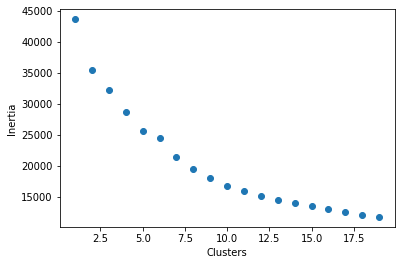

In [ ]:
# elbow diagram
inertia_dict = {}
for k in range(1,20):
    km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = km.inertia_    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

In [ ]:
# detect wether any column has zeros
zero_test = (outlier_df == 0).any()
zero_test

hotel_id              False
city_id               False
content_score         False
n_images               True
distance_to_center     True
avg_rating            False
stars                  True
n_reviews              True
avg_rank              False
avg_price             False
avg_saving_percent     True
n_clicks               True
dtype: bool

In [ ]:
km = KMeans(n_clusters=11).fit(X)

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

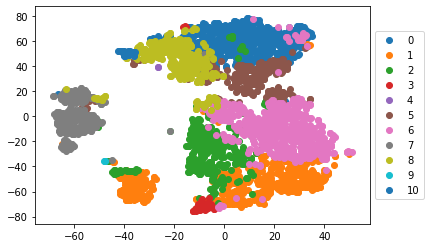

In [ ]:
y = km.labels_
fig, ax = plt.subplots()

groups = pd.DataFrame(X_tsne, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y, label=name);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
imputed2_df['km_labels'] = pd.Series(km.labels_, index=imputed2_df.index)
imputed2_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks,km_labels
108812,2.014708e+11,874890.0,54.0,0.0,1139.0,82.057911,5.0,0.0,15.636,61.95,0.0,0,2
314264,3.090130e+11,139398.0,24.0,0.0,0.0,86.000000,0.0,96.0,13.400,232.87,0.0,0,9
102145,8.637300e+10,68564.0,65.0,2.0,421.0,85.000000,4.0,129.0,12.090,84.27,20.0,6,3
13163,5.185987e+10,38952.0,57.0,3.0,3061.0,84.000000,2.0,537.0,14.500,86.59,2.0,0,3
199435,6.179556e+10,253842.0,62.0,1.0,1775.0,77.000000,3.0,147.0,24.000,27.60,9.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288021,1.528746e+11,26992.0,49.0,0.0,1216.0,81.686448,3.0,0.0,20.333,257.12,6.0,0,3
48610,3.511192e+09,30554.0,62.0,5.0,1792.0,85.000000,4.0,102.0,15.262,109.76,10.0,38,3
20286,2.908329e+10,193284.0,66.0,2.0,2102.0,82.000000,4.0,2241.0,15.215,98.84,4.0,118,3
311631,1.828130e+11,54372.0,48.0,0.0,1997.0,77.180199,0.0,0.0,16.556,114.00,0.0,0,7


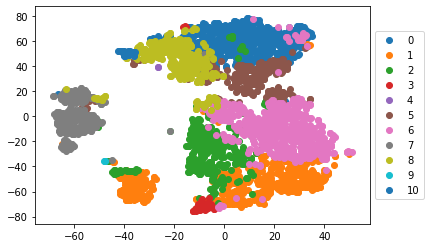

In [ ]:
y = km.labels_
fig, ax = plt.subplots()

groups = pd.DataFrame(X_tsne, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y, label=name);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
y = km.labels_
fig, ax = plt.subplots()

groups = pd.DataFrame(X_tsne, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y, label=name);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))y = km.labels_
fig, ax = plt.subplots()

groups = pd.DataFrame(X_tsne, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y, label=name);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))outlier_df = imputed2_df[~imputed2_df['km_labels'].isin([2, 8])]
outlier_df.drop('km_labels', axis='columns', inplace=True)
outlier_df.info()
outlier_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3963 entries, 108812 to 123976
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            3963 non-null   float64
 1   city_id             3963 non-null   float64
 2   content_score       3963 non-null   float64
 3   n_images            3963 non-null   float64
 4   distance_to_center  3963 non-null   float64
 5   avg_rating          3963 non-null   float64
 6   stars               3963 non-null   float64
 7   n_reviews           3963 non-null   float64
 8   avg_rank            3963 non-null   float64
 9   avg_price           3963 non-null   float64
 10  avg_saving_percent  3963 non-null   float64
 11  n_clicks            3963 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.5 KB


,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.963000e+03,3963.000000,3963.000000,3963.000000,3.963000e+03,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,1.313308e+11,149768.124148,51.227353,52.797376,1.037735e+04,80.982066,1.203634,946.228615,14.730032,109.329001,7.386071,14.314408
std,1.041411e+11,221315.739578,11.559823,2410.865417,1.102728e+05,5.401760,1.648020,2186.498364,5.785231,125.181807,13.358465,127.481365
min,1.597837e+08,1476.000000,7.000000,-1.000000,0.000000e+00,51.000000,0.000000,0.000000,1.000000,4.170000,0.000000,0.000000
25%,3.855664e+10,32194.000000,45.000000,0.000000,5.360000e+02,77.180199,0.000000,0.000000,11.118000,52.000000,0.000000,0.000000
50%,1.084271e+11,55122.000000,53.000000,1.000000,1.454000e+03,81.328734,0.000000,186.000000,15.000000,78.790000,0.000000,0.000000
75%,2.265132e+11,137466.000000,60.000000,2.000000,3.918000e+03,84.000000,3.000000,831.000000,18.375000,121.790000,10.000000,2.000000
max,3.227965e+11,878516.000000,78.000000,140340.000000,5.112625e+06,96.000000,5.000000,41181.000000,94.000000,1962.040000,99.000000,6486.000000


# Feature Engineering

In [32]:
imputed2_df = imputed_df
outlier_df = imputed2_df

In [33]:
# detect wether any column has zeros
zero_test = (outlier_df == 0).any()
zero_test

hotel_id              False
city_id               False
content_score         False
n_images               True
distance_to_center     True
avg_rating            False
stars                  True
n_reviews              True
avg_rank              False
avg_price             False
avg_saving_percent     True
n_clicks               True
dtype: bool

In [34]:
# transform each column with suitable transformation function 
transformation_dict = {'hotel_id': lambda x: x**1,
                       'city_id': lambda x: x**1, 
                       'content_score': lambda x: x**3,
                       'n_images': lambda x: np.log(x+2),
                       'distance_to_center': lambda x: np.log(x+1),
                       'avg_rating': lambda x: x**5,
                       'stars': lambda x: np.log(x+100),
                       'n_reviews': lambda x: np.log(x+1),
                       'avg_rank': lambda x: x**1,
                       'avg_price': lambda x: np.log(x+1),
                       'avg_saving_percent': lambda x:np.log(x+1),
                       'n_clicks': lambda x: np.log(x+1)}
transformed_df = outlier_df.transform(transformation_dict, axis='index')

In [35]:
transformed_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.964870e+05,396487.000000,396487.000000,396487.000000,396487.000000,3.964870e+05,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000
mean,1.326304e+11,149072.936066,151281.061059,1.090518,7.090329,3.765751e+09,4.616557,4.447177,14.694502,4.386544,1.029541,0.771865
std,1.033722e+11,219074.667559,77793.440310,0.551837,2.192110,1.073809e+09,0.015897,2.983428,5.604578,0.744729,1.392136,1.314637
min,1.557962e+08,2.000000,343.000000,0.000000,0.000000,4.543542e+07,4.605170,0.000000,1.000000,1.609438,0.000000,0.000000
25%,4.062255e+10,32080.000000,91125.000000,0.693147,6.302619,3.133967e+09,4.605170,0.000000,11.091000,3.952397,0.000000,0.000000
50%,1.087280e+11,55122.000000,148877.000000,1.098612,7.324490,3.846382e+09,4.605170,5.247024,15.000000,4.365008,0.000000,0.000000
75%,2.281935e+11,137456.000000,205379.000000,1.386294,8.333030,4.437053e+09,4.634729,6.656727,18.375000,4.803283,2.397895,1.098612
max,3.237114e+11,878736.000000,531441.000000,14.688440,16.724680,8.587340e+09,4.653960,12.553520,100.000000,8.987322,4.605170,9.528285


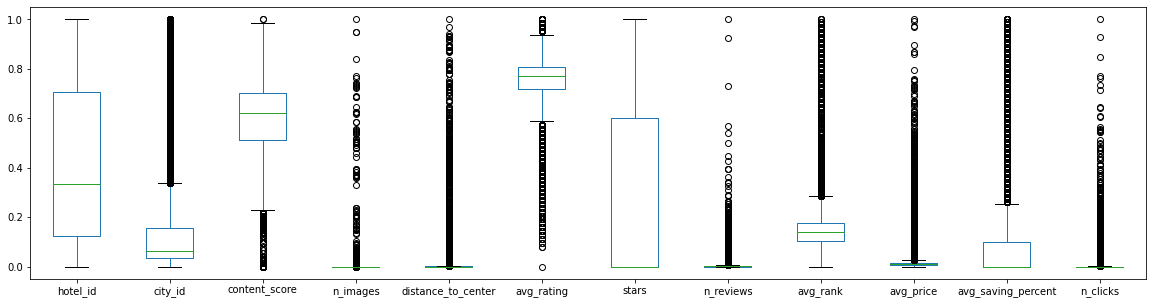

In [36]:
min_max_dataframe_dist(outlier_df)

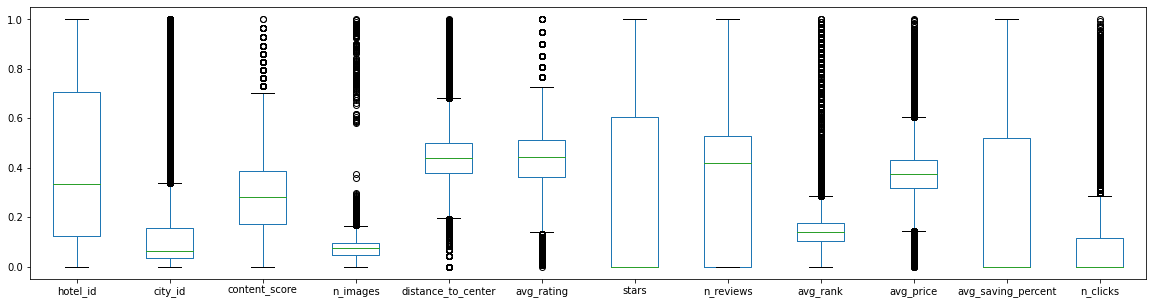

In [37]:
min_max_dataframe_dist(transformed_df)

Comparison of two distribution shows that the dataframe after transformation has less skewed distribution.

# Descriptive Analytics 

In [38]:
df = transformed_df

In [39]:
from scipy import stats
corr_array=[]
for i in range(df.shape[1]-1):  
    corr_array.append([df.columns[i], 
    np.abs(stats.pearsonr(df[df.columns[i]], df[df.columns[-1]])[0]),
    stats.pearsonr(df[df.columns[i]], df[df.columns[-1]])[0],
    stats.pearsonr(df[df.columns[i]], df[df.columns[-1]])[1]])
    
corr_df = pd.DataFrame(corr_array, columns = ['feature', 'abs_corr', 'corr', 'p_value'])
corr_df.sort_values(by = 'abs_corr', ascending = False, inplace = True)
corr_df.reset_index(drop = True, inplace = True)
corr_df

,feature,abs_corr,corr,p_value
0,avg_saving_percent,0.371748,0.371748,0.000000e+00
1,n_reviews,0.363980,0.363980,0.000000e+00
2,stars,0.353494,0.353494,0.000000e+00
3,content_score,0.350617,0.350617,0.000000e+00
4,n_images,0.349577,0.349577,0.000000e+00
5,hotel_id,0.337519,-0.337519,0.000000e+00
6,avg_rank,0.231643,-0.231643,0.000000e+00
7,city_id,0.129412,-0.129412,0.000000e+00
8,avg_price,0.096767,0.096767,0.000000e+00
9,distance_to_center,0.013187,0.013187,1.008728e-16


## Statistical Analysis

In [40]:
def OLS(df):
    # seperate target from features
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    # fit OLS function and display results
    X_withconstant = sm.add_constant(X)
    lr = sm.OLS(y, X_withconstant).fit()
    display(lr.summary().tables[0])

In [41]:
# scale data with standard scaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(transformed_df), columns=transformed_df.columns)

In [42]:
OLS(scaled_df)

Dep. Variable:,n_clicks,R-squared:,0.250
Model:,OLS,Adj. R-squared:,0.250
Method:,Least Squares,F-statistic:,1.202e+04
Date:,"Thu, 12 Nov 2020",Prob (F-statistic):,0.00
Time:,18:20:03,Log-Likelihood:,-5.0555e+05
No. Observations:,396487,AIC:,1.011e+06
Df Residuals:,396475,BIC:,1.011e+06
Df Model:,11,,
Covariance Type:,nonrobust,,


In [43]:
OLS(scaled_df)

Dep. Variable:,n_clicks,R-squared:,0.250
Model:,OLS,Adj. R-squared:,0.250
Method:,Least Squares,F-statistic:,1.202e+04
Date:,"Thu, 12 Nov 2020",Prob (F-statistic):,0.00
Time:,18:20:03,Log-Likelihood:,-5.0555e+05
No. Observations:,396487,AIC:,1.011e+06
Df Residuals:,396475,BIC:,1.011e+06
Df Model:,11,,
Covariance Type:,nonrobust,,


In [44]:
OLS(transformed_df)

Dep. Variable:,n_clicks,R-squared:,0.250
Model:,OLS,Adj. R-squared:,0.250
Method:,Least Squares,F-statistic:,1.202e+04
Date:,"Thu, 12 Nov 2020",Prob (F-statistic):,0.00
Time:,18:20:04,Log-Likelihood:,-6.1402e+05
No. Observations:,396487,AIC:,1.228e+06
Df Residuals:,396475,BIC:,1.228e+06
Df Model:,11,,
Covariance Type:,nonrobust,,


In [45]:
OLS(outlier_df)

Dep. Variable:,n_clicks,R-squared:,0.056
Model:,OLS,Adj. R-squared:,0.055
Method:,Least Squares,F-statistic:,2118.
Date:,"Thu, 12 Nov 2020",Prob (F-statistic):,0.00
Time:,18:20:04,Log-Likelihood:,-2.4611e+06
No. Observations:,396487,AIC:,4.922e+06
Df Residuals:,396475,BIC:,4.922e+06
Df Model:,11,,
Covariance Type:,nonrobust,,


The above result suggest that both transformations and standard scaler increase model accuracy. The effect of transformations are more significant than standard scaler. Through transformations the `R-squared` metric has improved from 0.055 to 0.285 while standard scaler does not have any effect on this metric. Through standard scaler log-liklihood, AIC, and BIC have improved slightly.

## Feature Selection

In [46]:
def OLS_VIF(df):
    # seperate target from features
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    # fit OLS function and display results
    X_withconstant = sm.add_constant(X)
    lr = sm.OLS(y, X_withconstant).fit()

    # table of significant coefficinets sorted by absolute value
    coef_table = lr.summary().tables[1]
    #display(coef_table)
    coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
    coef_df['coef'] = coef_df['coef'].astype(float)
    coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
    coef_df['abs_coef'] = np.abs(coef_df['coef'])
    coef_df.drop(0, axis='index', inplace=True)
    
    # variance inflation factors
    vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    vif_series.sort_values(ascending=False, inplace=True)
    #display(pd.DataFrame(vif_series, columns=['vif']))
    
    return [coef_df, vif_series]

In [47]:
old_df = transformed_df
[coef_df, vif_series] = OLS_VIF(old_df) 

In [48]:
while not coef_df[coef_df['P>|t|'] >= 0.05].empty: # check wether there are any coefficient with p-value > 5%

    print(f'Droped "{vif_series.index[0]}" column due to {vif_series.values[0]} VIF')
    new_df = old_df.drop(vif_series.index[0], axis = 1) # remove the feature with highest VIF
    [coef_df, vif_series] = OLS_VIF(new_df)
    old_df = new_df


In [49]:
df = old_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-33.6151,0.722,-46.574,0.000,-35.030,-32.200
hotel_id,-3.47e-13,3.1e-14,-11.192,0.000,-4.08e-13,-2.86e-13
city_id,-5.471e-07,8.38e-09,-65.295,0.000,-5.64e-07,-5.31e-07
content_score,4.458e-07,3.9e-08,11.434,0.000,3.69e-07,5.22e-07
n_images,0.3241,0.004,77.710,0.000,0.316,0.332
distance_to_center,-0.0271,0.001,-32.110,0.000,-0.029,-0.025
avg_rating,1.017e-11,1.88e-12,5.413,0.000,6.49e-12,1.38e-11
stars,7.3204,0.157,46.669,0.000,7.013,7.628
n_reviews,0.0469,0.001,50.448,0.000,0.045,0.049
avg_rank,-0.0356,0.000,-107.880,0.000,-0.036,-0.035


Dep. Variable:,n_clicks,R-squared:,0.250
Model:,OLS,Adj. R-squared:,0.250
Method:,Least Squares,F-statistic:,1.202e+04
Date:,"Thu, 12 Nov 2020",Prob (F-statistic):,0.00
Time:,18:20:09,Log-Likelihood:,-6.1402e+05
No. Observations:,396487,AIC:,1.228e+06
Df Residuals:,396475,BIC:,1.228e+06
Df Model:,11,,
Covariance Type:,nonrobust,,


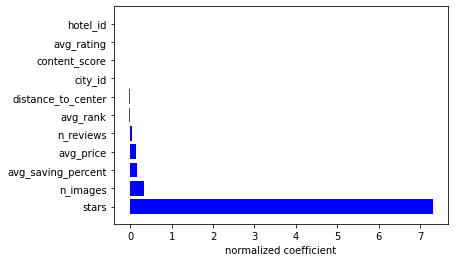

In [50]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])
display(lr.summary().tables[0])

# table of significant coefficinets sorted by absolute value
coef_table = lr.summary().tables[1]
coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df.drop(0, axis='index', inplace=True)
coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

# bar chart of feature coefficients
import matplotlib.pyplot as plt
plt.barh(coefs_by_mag[''], coefs_by_mag['coef'], color=np.where(coefs_by_mag['coef']>0, 'blue', 'red'))
plt.xlabel('normalized coefficient');

The insights are compatible with intution. The more stars, saving, or price a hotel has the more clicks it gets while on the other hand the further it is in the ranking or distance from city center the less clicks

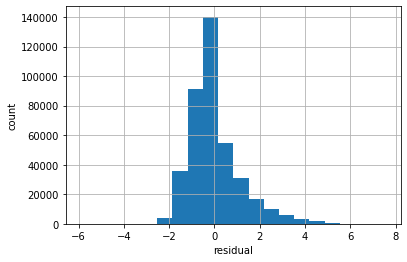

In [51]:
# least squares residuals
lr.resid.hist(bins=20)
plt.xlabel('residual')
plt.ylabel('count');

Residuals are normally distributed which indicates that the model has good quality.

Text(0, 0.5, 'residual')

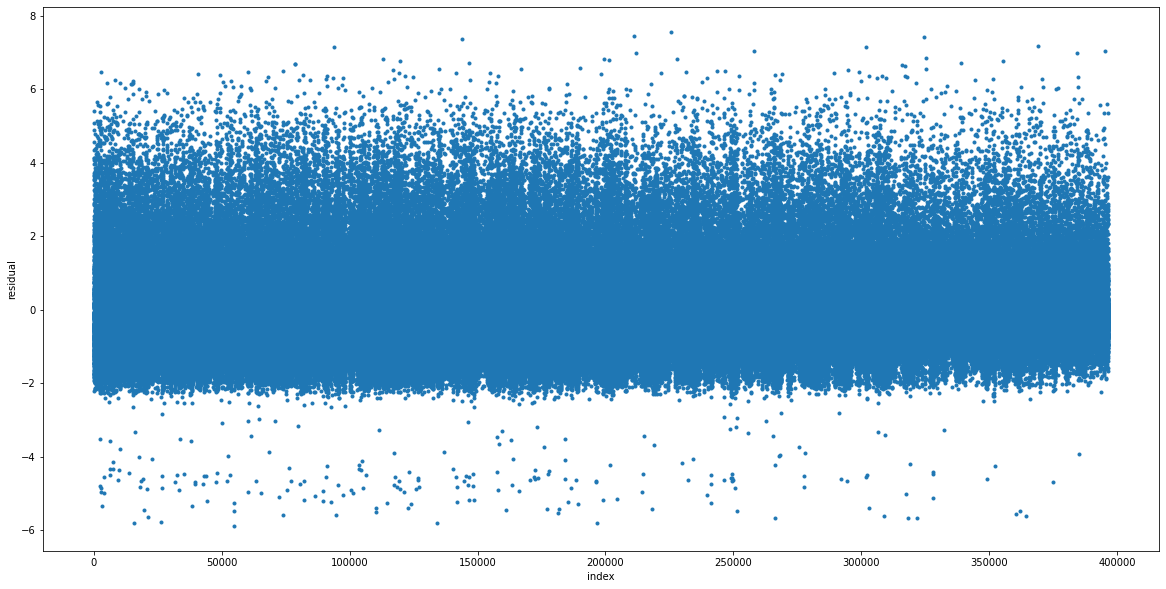

In [52]:
# least squares residuals
lr.resid.plot(style='.', figsize=(20, 10))
plt.xlabel('index')
plt.ylabel('residual')

The residuals is quite uniform indicating that there is not much issues with heterostacticity. 

# Predictive Analytics

In [53]:
df = transformed_df

In [54]:
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

## Model Selection 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Scaling is performed after train-test split to avoid data leakage.

In [56]:
# scale data with standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
def create_model(activation='relu',
                 optimizer='adam',
                 dropout=0.1):
    '''
    create deep learning model with keras
    '''
        
    # create model
    tf = Sequential()

    tf.add(Dense(32, activation=activation, input_shape=(X_train.shape[1:])))
    tf.add(Dropout(dropout))
    tf.add(BatchNormalization())

    tf.add(Dense(32, activation=activation))
    tf.add(Dropout(dropout))

    tf.add(Dense(1, activation='linear'))


    # Compile model
    tf.compile(loss='mean_absolute_error',
                      optimizer=optimizer,
                      metrics=['accuracy'])
    return tf

In [50]:
model_dict = {'Nearest Neighbors': KNeighborsRegressor(n_neighbors = 10),
              'Linear Regression': SGDRegressor(alpha=0.1),
              'Decision Tree': DecisionTreeRegressor(max_depth =5),
              'Support Vectors': SVR(),
              'Random Forest': RandomForestRegressor(max_depth =5),
              'XG Boost': XGBRegressor(),
              'ML Perceptron': MLPRegressor(),
              'Deep Learning': create_model()}

model_df = pd.DataFrame(np.nan, index=model_dict.keys(), columns=['Train Score', 'Test Score'])
for model_name, model in model_dict.items():
    if model_name == 'Deep Learning':
        model.fit(X_train, y_train, batch_size=480, epochs=40, verbose=0, validation_data = (X_train, y_train))
        loss_score, train_score = model.evaluate(X_train, y_train, batch_size=480, verbose=0)
        loss_score, test_score = model.evaluate(X_test, y_test, batch_size=480, verbose=0)
        
        model_df.loc[model_name, 'Train Score'] = train_score
        model_df.loc[model_name, 'Test Score'] = test_score
    else:
        model.fit(X_train, y_train)
        model_df.loc[model_name, 'Train Score'] = model.score(X_train, y_train)
        model_df.loc[model_name, 'Test Score'] = model.score(X_test, y_test)
model_df

Nearest Neighbors
Linear Regression
Decision Tree
Support Vectors
Random Forest
XG Boost
[22:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ML Perceptron
Deep Learning


,Train Score,Test Score
Nearest Neighbors,0.454797,0.338460
Linear Regression,0.286848,0.271434
Decision Tree,0.483143,0.290067
Support Vectors,0.410121,0.340177
Random Forest,0.547946,0.397579
XG Boost,0.624829,0.464457
ML Perceptron,0.530853,0.373041
Deep Learning,0.554659,0.545363


Based on the results in the table decision tree, random forest, xg boost, and deep learning models are selected for further optimizaiton of the hyperparameters.

## Grid Search

In [59]:
# random forest
rf_pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', RandomForestRegressor())])

rf_params = {'regressor__n_estimators': [10, 100],
             'regressor__max_depth': [1, 10],
             'regressor__max_features': [1, 2]}

rf_grid = GridSearchCV(rf_pipe, param_grid=rf_params, cv=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.score(X_train, y_train))
print(rf_grid.score(X_test, y_test))
rf_grid.best_estimator_

0.49064115696156063
0.4700638966864015


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=10,
                                       max_features=2, max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [62]:
# xg boost
xg_pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', XGBRegressor())])
xg_params = {'regressor__n_estimators': [10, 100],
             'regressor__max_depth': [1, 10],
             'regressor__gamma': [0, 1]}
xg_grid = GridSearchCV(xg_pipe, param_grid=xg_params, cv=2)
xg_grid.fit(X_train, y_train)
print(xg_grid.score(X_train, y_train))
print(xg_grid.score(X_test, y_test))
xg_grid.best_estimator_

[18:42:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=None,
                              n_estimators=100, n_jobs=1, nthread=None,
                              objective='reg:linear', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              seed=None, silent=None, subsample=1,
                              verbosity=1))],
         verbose=False)

In [49]:
# deep learning 
tf_params = {'activation': ['relu', 'tanh'],
             'optimizer': ['adam', 'rmsprop'],
             'dropout': [0.1, 0.2]}

tf_grid = GridSearchCV(KerasClassifier(build_fn=create_model, verbose=0), param_grid=tf_params, cv=2)
tf_grid.fit(X_train, y_train)
print(tf_grid.score(X_train, y_train))
print(tf_grid.score(X_test, y_test))
tf_grid.best_estimator_

0.6537722945213318
0.6553237438201904


In [51]:
tf = create_model(activation=tf_hyperparams['activation'],
                  optimizer=tf_hyperparams['optimizer'],
                  dropout=tf_hyperparams['dropout'])

In [50]:
tf_hyperparams = tf_grid.best_estimator_.sk_params
tf_hyperparams

{'activation': 'relu', 'dropout': 0.1, 'optimizer': 'adam', 'verbose': 0}

In [52]:
tf.fit(X_train, y_train, batch_size=480, epochs=40, verbose=0, validation_data = (X_train, y_train))
loss_score, train_score = tf.evaluate(X_train, y_train, batch_size=480, verbose=0)
train_score
loss_score, test_score = tf.evaluate(X_test, y_test, batch_size=480, verbose=0)
test_score

0.6553237438201904

In [54]:
tf.save('/content/drive/My Drive/Audicia/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Audicia/assets


## Model Predictions

In [85]:
test_df = pd.read_csv('test_set.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132162 entries, 0 to 132161
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            132162 non-null  int64  
 1   city_id             132007 non-null  float64
 2   content_score       132007 non-null  float64
 3   n_images            132006 non-null  float64
 4   distance_to_center  131999 non-null  float64
 5   avg_rating          95532 non-null   float64
 6   stars               131987 non-null  float64
 7   n_reviews           131999 non-null  float64
 8   avg_rank            132162 non-null  float64
 9   avg_price           132104 non-null  float64
 10  avg_saving_percent  132104 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 11.1 MB


In [86]:
test_df.isna().mean()*100

hotel_id               0.000000
city_id                0.117280
content_score          0.117280
n_images               0.118037
distance_to_center     0.123333
avg_rating            27.715985
stars                  0.132413
n_reviews              0.123333
avg_rank               0.000000
avg_price              0.043886
avg_saving_percent     0.043886
dtype: float64

In [87]:
test_df.fillna(df.median(), inplace=True)
test_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.0,58.0,2.0,11503.0,8.900000e+01,0.0,168.0,13.500,90.19,32.0
1,16036037903,28134.0,68.0,4.0,938.0,8.100000e+01,5.0,735.0,13.667,98.27,19.0
2,288585940112,30578.0,19.0,0.0,38982.0,3.558116e+09,0.0,0.0,20.462,48.77,0.0
3,129041645070,54398.0,47.0,0.0,1683.0,8.000000e+01,0.0,69.0,15.000,72.32,0.0
4,12460296563,63890.0,59.0,3.0,1299.0,8.000000e+01,3.0,1470.0,10.000,24.54,19.0
...,...,...,...,...,...,...,...,...,...,...,...
132157,146542092044,22896.0,47.0,0.0,3259.0,8.400000e+01,0.0,138.0,14.280,48.83,0.0
132158,191459858176,28030.0,50.0,0.0,5032.0,8.600000e+01,0.0,996.0,7.000,32.46,4.0
132159,71241988826,137926.0,62.0,0.0,1666.0,7.900000e+01,0.0,102.0,17.600,113.39,19.0
132160,204878950620,54574.0,51.0,1.0,521.0,8.500000e+01,3.0,324.0,18.925,85.63,0.0


In [88]:
test_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
count,1.321620e+05,132162.000000,132162.000000,1.321620e+05,1.321620e+05,1.321620e+05,132162.000000,132162.000000,132162.000000,132162.000000,132162.000000
mean,1.327811e+11,149138.269714,225.495014,3.566677e+02,1.550602e+04,9.861668e+08,1.160461,900.137314,14.714384,108.671718,7.114299
std,1.035654e+11,219487.963279,5093.771354,2.094004e+04,2.493657e+05,1.592605e+09,1.620701,2514.619214,5.658890,144.878166,12.977148
min,1.558896e+08,1354.000000,7.000000,-1.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1.000000,4.000000,0.000000
25%,4.082460e+10,32008.000000,45.000000,0.000000e+00,5.390000e+02,8.000000e+01,0.000000,0.000000,11.043000,50.780000,0.000000
50%,1.082218e+11,55122.000000,53.000000,1.000000e+00,1.511000e+03,8.500000e+01,0.000000,186.000000,15.000000,77.450000,0.000000
75%,2.288447e+11,137418.000000,59.000000,2.000000e+00,4.152000e+03,3.558116e+09,3.000000,759.000000,18.429000,120.987500,9.000000
max,3.233873e+11,878696.000000,148877.000000,2.628317e+06,1.603577e+07,3.558116e+09,5.000000,254859.000000,99.000000,7938.770000,100.000000


In [89]:
test_df.nunique() 

hotel_id              132162
city_id                20903
content_score             74
n_images                 139
distance_to_center     19832
avg_rating                57
stars                      7
n_reviews               4116
avg_rank               14551
avg_price              28321
avg_saving_percent       101
dtype: int64

In [90]:
test_df.head() 

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.0,58.0,2.0,11503.0,8.900000e+01,0.0,168.0,13.500,90.19,32.0
1,16036037903,28134.0,68.0,4.0,938.0,8.100000e+01,5.0,735.0,13.667,98.27,19.0
2,288585940112,30578.0,19.0,0.0,38982.0,3.558116e+09,0.0,0.0,20.462,48.77,0.0
3,129041645070,54398.0,47.0,0.0,1683.0,8.000000e+01,0.0,69.0,15.000,72.32,0.0
4,12460296563,63890.0,59.0,3.0,1299.0,8.000000e+01,3.0,1470.0,10.000,24.54,19.0


In [92]:
# transform and scale the data
test_trans_df = test_df.transform(transformation_dict, axis='index')
test_trans_df = scaler.transform(test_trans_df)

In [ ]:
#best_model = model_dict['XG Boost']
best_model = tf
log_n_clicks_array = best_model.predict(test_trans_df)
n_clicks_array = np.e ** log_n_clicks_array 
n_clicks_df = pd.DataFrame(n_clicks_array, columns=['predictions'])

In [113]:
n_clicks_df.describe()

,predictions
count,95532.000000
mean,4.445378
std,92.117462
min,0.538418
25%,1.003648
50%,1.127315
75%,2.261675
max,11713.804688


The descriptive statistics of the predictions shows that they are consistent with the train data, so they were stored to a csv file as follows:

In [98]:
n_clicks_df.to_csv('predictions.csv') 

# Conclusion

This project presents prediction of number clicks on a hotel website. The data was collected and cleaned. Missing values were treated approperiately based on their abundance. Missing values that were not missing completely at random were imputed using linear regression. The outliers in data were identified by k-means clustering technique and excluded from the dataset for enhaced accuracy. Statistically significant factors on the number of clicks were identified using ordinary least squares and variance inflation factors and the effect of transformations and standard scaler on accuracy of the model has been demonstrated. The collection of models for hyperparameter optimization was narrowed down by a model selection process based on a large collection of common machine learning algorithms. Random Forest and XGboost models were selected and optimized through grid search, but were beaten by the deep learning model built using tensorflow keras. This model was used to predict the number of clicks and store it in a csv file.